<a href="https://colab.research.google.com/github/Sajjat-Hossain/KNN-Regression/blob/main/KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('/content/weight-height.csv')

In [113]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [114]:
df.shape

(8555, 3)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [116]:
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0


In [117]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [119]:
df.Gender = le.fit_transform(df.Gender)

In [120]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [121]:
df.Gender.unique()

array([1, 0])

In [122]:
x = df.drop('Weight',axis=1)
y = df.Weight

In [123]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [124]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=42)

In [127]:
X_train

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308
...,...,...
5734,0,63.349988
5191,0,58.861625
5390,0,64.325406
860,1,69.074492


# LinearRegression

In [128]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [129]:
reg.fit(X_train,y_train)

LinearRegression()

In [130]:
reg.coef_

array([19.54151693,  5.9562333 ])

In [131]:
reg.intercept_

-243.79306041624142

In [132]:
df.corr()

,Gender,Height,Weight
Gender,1.000000,0.682524,0.790208
Height,0.682524,1.000000,0.922975
Weight,0.790208,0.922975,1.000000


<Axes: >

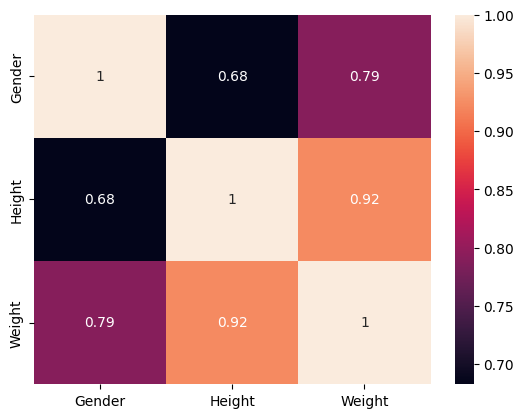

In [133]:
sns.heatmap(df.corr(),annot=True)

In [161]:
y_pred = reg.predict(X_test)
y_pred

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [147]:
tranning_score = reg.score(X_train,y_train)
testing_score = reg.score(X_test,y_test)

In [148]:
tranning_score

0.8973793060969246

In [149]:
testing_score

0.905911242442266

In [154]:
from sklearn.metrics import mean_squared_error

In [153]:
mse =mean_squared_error(y_test,y_pred)
mse

96.8373443783061

# KNN

In [155]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [156]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [160]:
knn_y_pred = knn.predict(X_test)
knn_y_pred

array([142.1445657 , 181.38276924, 187.07075266, ..., 101.79654426,
       192.43702356, 145.3632227 ])

In [158]:
knn.score(X_test,y_test)

0.8821086423439015

In [157]:
knn.score(X_train,y_train)

0.9172142723737918

In [162]:
mse = mean_squared_error(y_test,knn_y_pred)
mse

121.33528273624482